In [1]:
# Import all of the necessary libraries
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the image
hyena = cv2.imread('/content/Hyenas2-scaled.jpg')

In [3]:
down_size = (700,500)
hyena = cv2.resize(hyena, down_size)

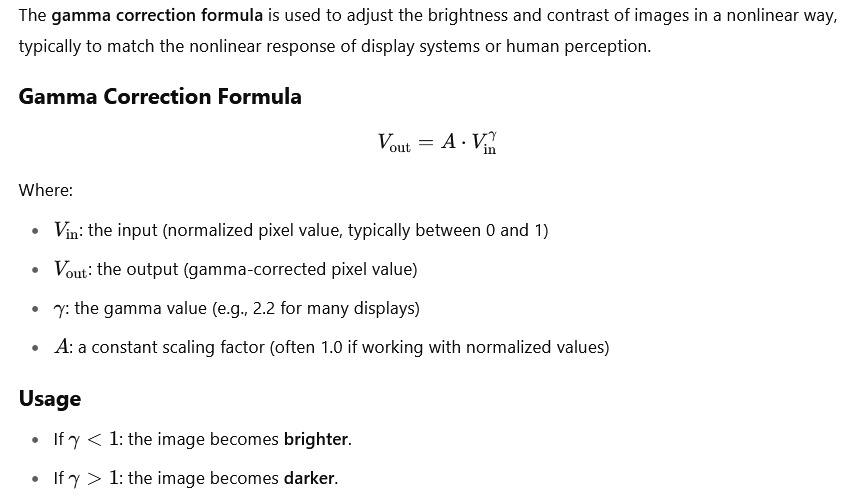

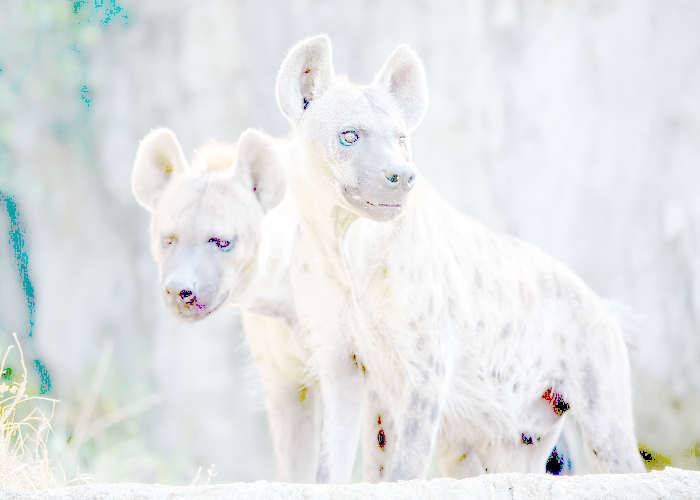

In [4]:
# Apply gamma correction at 0.1
for gamma in [0.1]:
  gamma_corrected = np.array(255*(hyena / 255) ** gamma, dtype = 'uint8')
  cv2_imshow(gamma_corrected)

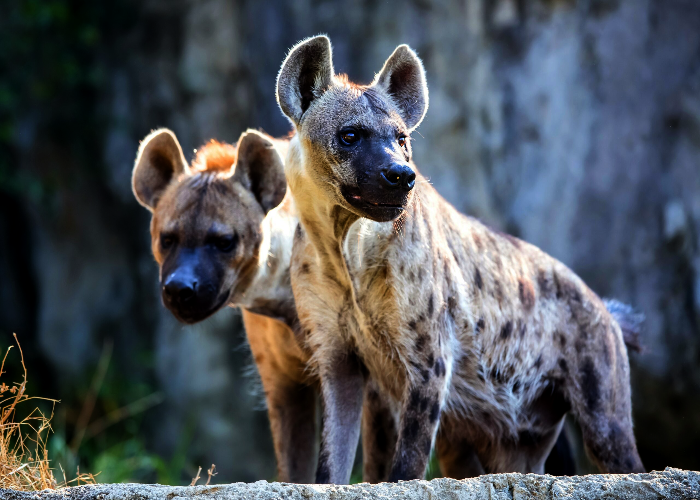

In [5]:
# Apply gamma correction at 1.5
for gamma in [1.5]:
  gamma_corrected = np.array(255*(hyena / 255) ** gamma, dtype = 'uint8')
  cv2_imshow(gamma_corrected)

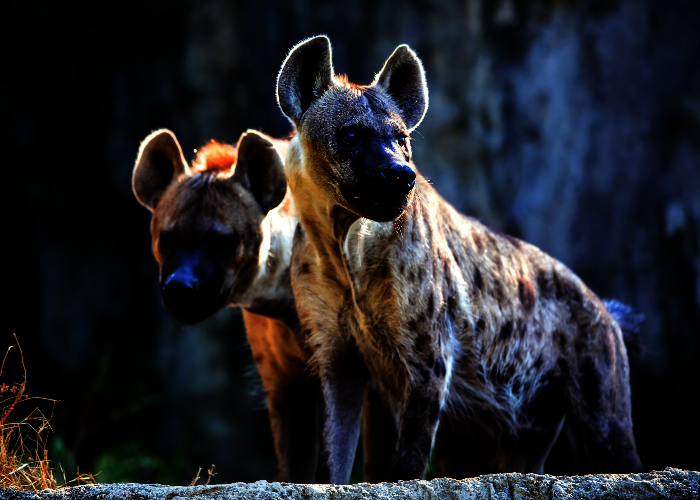

In [6]:
# Apply gamma correction at 3.5
for gamma in [3.5]:
  gamma_corrected = np.array(255*(hyena / 255) ** gamma, dtype = 'uint8')
  cv2_imshow(gamma_corrected)

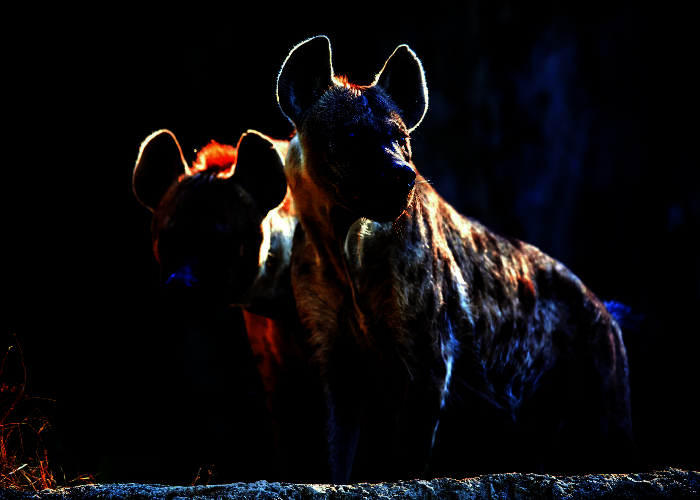

In [7]:
# Apply gamma correction at 8.8
for gamma in [8.8]:
  gamma_corrected = np.array(255*(hyena / 255) ** gamma, dtype = 'uint8')
  cv2_imshow(gamma_corrected)

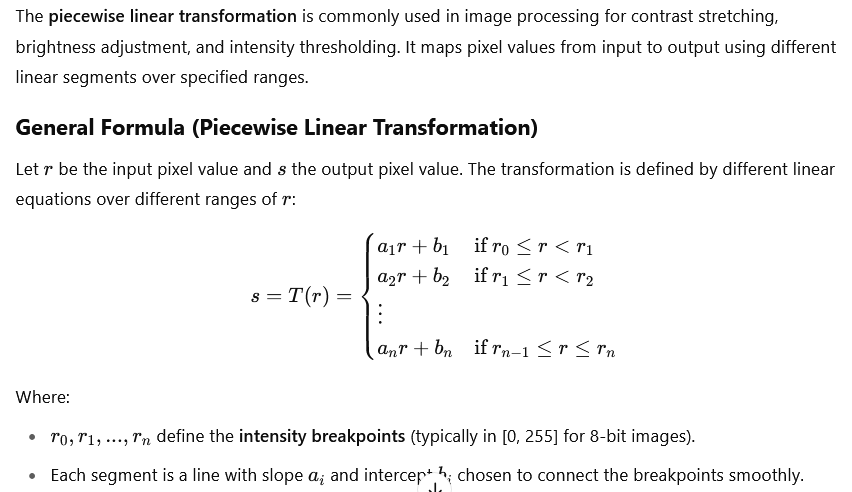

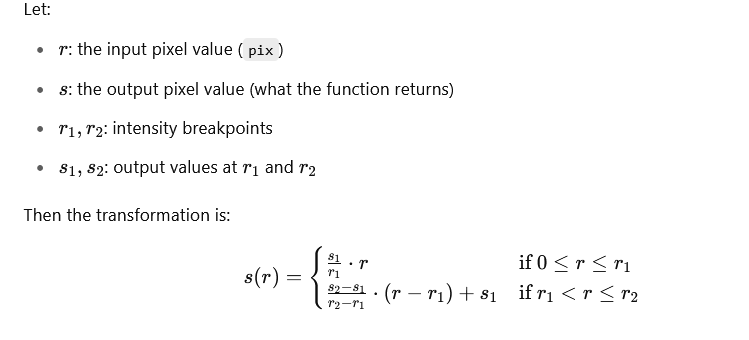

In [8]:
# Create a piecewise linear transformation function
def pixel(pix, r1, s1, r2, s2):
  if (0 <= pix and pix <= r1):
    return (s1 / r1) * pix
  elif (r1 < pix and pix <= r2):
    return ((s2 - s1) / (r2 - r1)) * (pix - r1) + s1
  else:
    return s2

In [9]:
# Set the parameters
r1 = 70
s1 = 0
r2 = 140
s2 = 255

In [10]:
# Vectorize the 'pixel' function for efficient array operations
pixel_corrected = np.vectorize(pixel)

In [11]:
# Apply the contrast stretching to the 'hyena' image
constrast_limited = pixel_corrected(hyena,r1,s1,r2,s2)

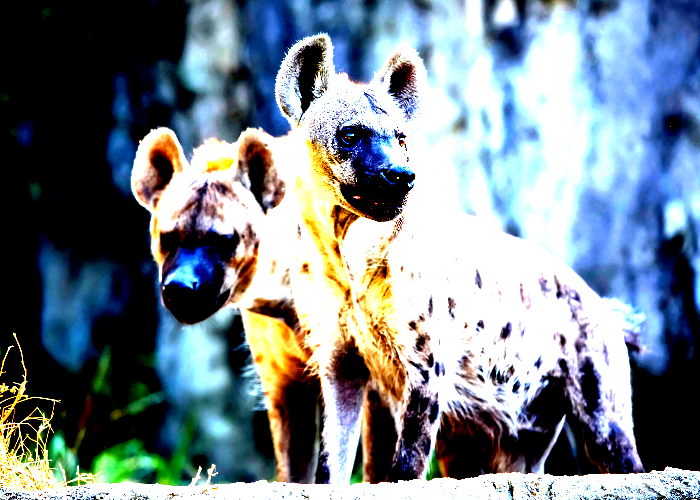

In [12]:
# Display the image
cv2_imshow(constrast_limited)

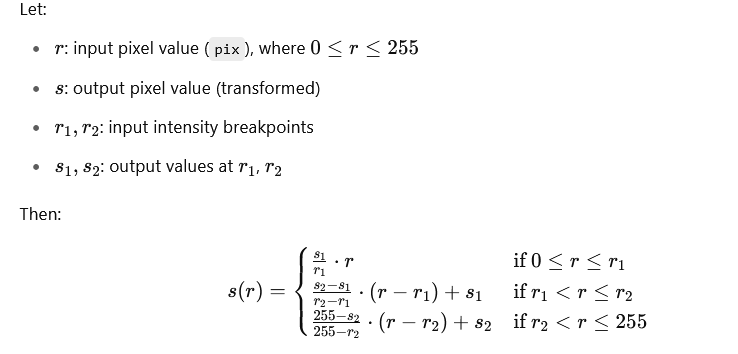

In [13]:
# Create a second piecewise linear transformation function
def pixelVal(pix, r1, s1, r2, s2):
    if (0 <= pix and pix <= r1):
        return (s1 / r1)*pix
    elif (r1 < pix and pix <= r2):
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1
    else:
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2

In [14]:
pixel_corrected = np.vectorize(pixelVal)

In [15]:
pixel_corrected = pixel_corrected(hyena, r1, s1, r2, s2)

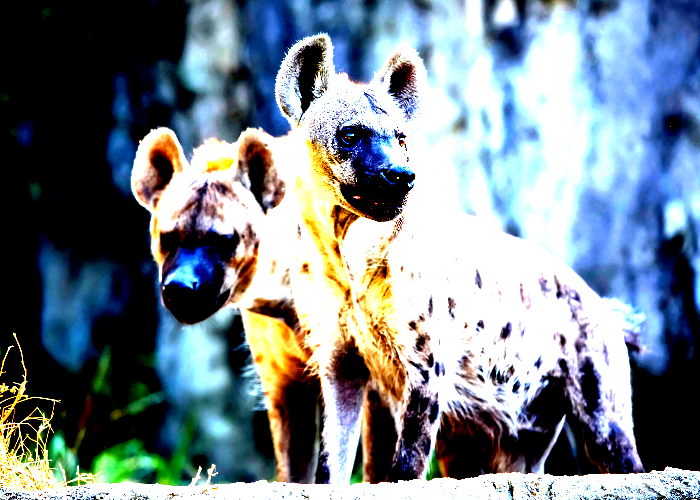

In [16]:
cv2_imshow(pixel_corrected)

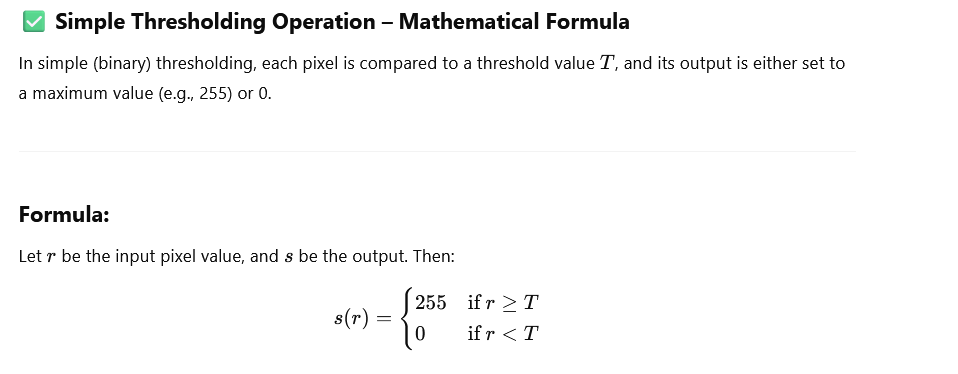

In [17]:
# Create a simple thresholding operation function
def threshold(pix, T):
    if pix > T:
        return 255
    else:
        return 0

In [18]:
# Set the threshold parameter
T = 180

In [19]:
pixel_corrected = np.vectorize(threshold)(hyena,T)

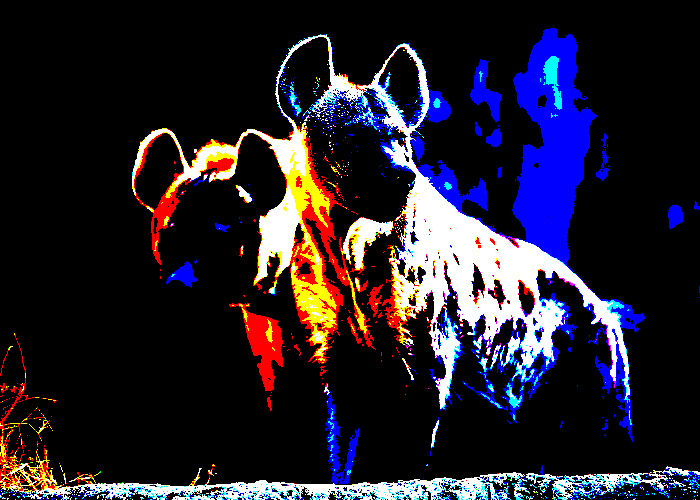

In [20]:
cv2_imshow(pixel_corrected)

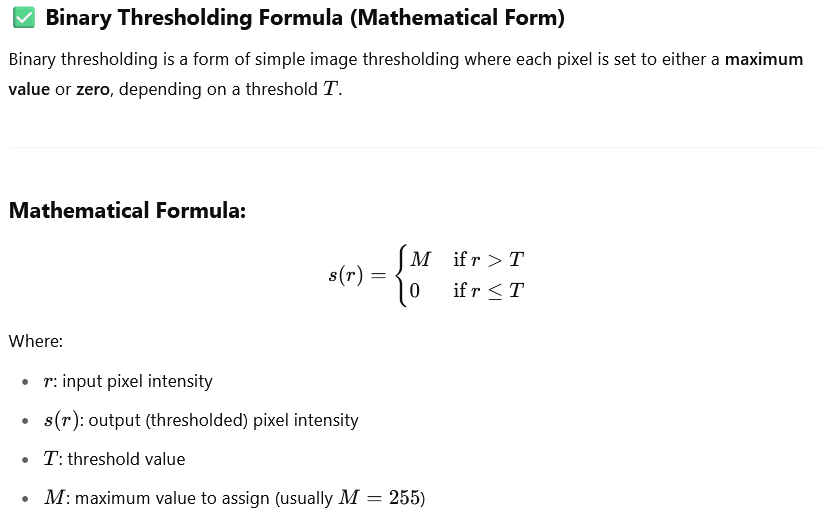

In [21]:
# Set the thresholding parameters for Binary Thresholding
ret, thresh = cv2.threshold(hyena, 100, 325, cv2.THRESH_BINARY)

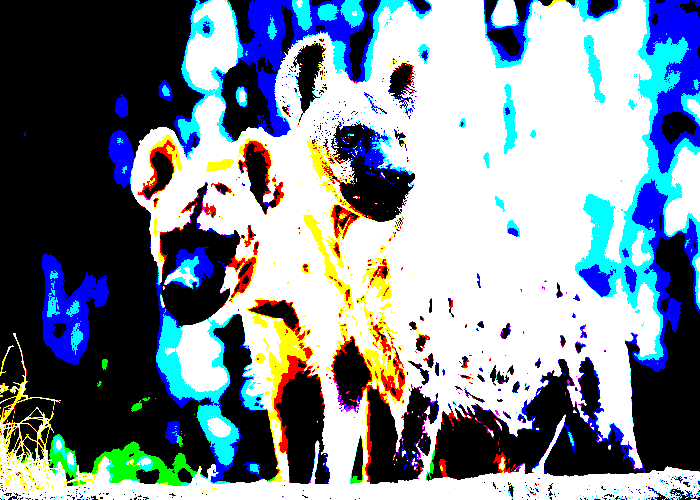

In [22]:
# Display the image
cv2_imshow(thresh)

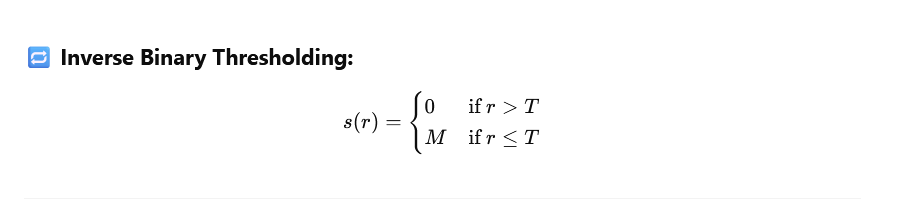

In [23]:
# Set the thresholding parameters for Binary Inverse Thresholding
ret, thresh = cv2.threshold(hyena, 115, 585, cv2.THRESH_BINARY_INV)

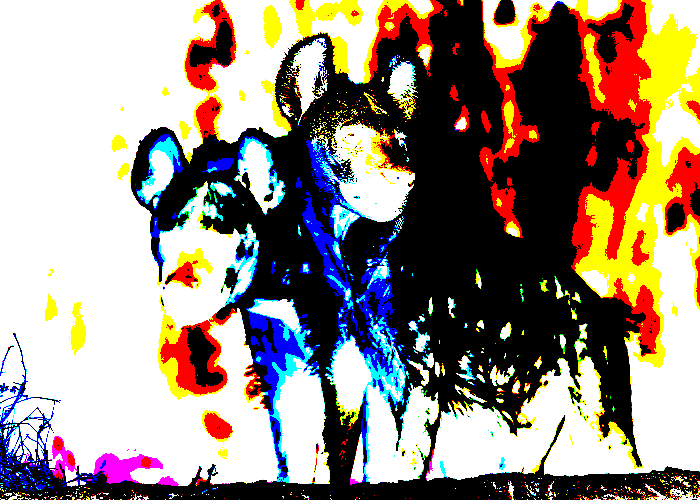

In [24]:
cv2_imshow(thresh)

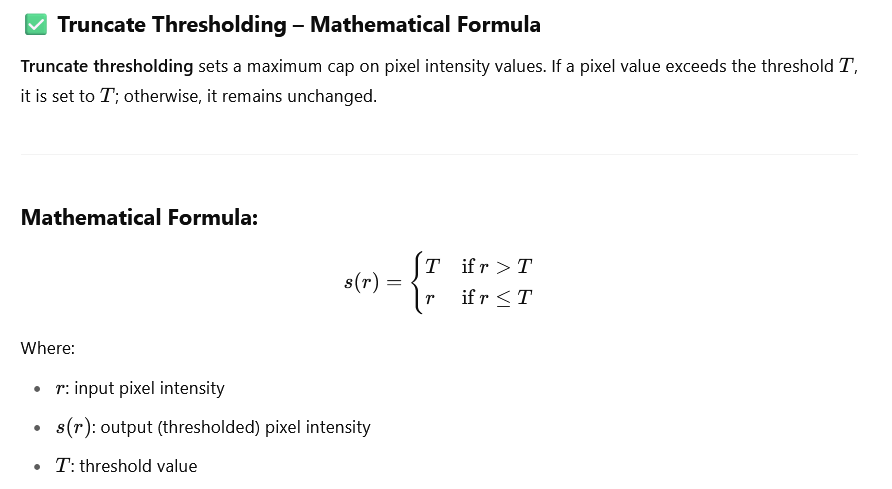

In [25]:
# Set the thresholding parameters for Truncate Thresholding
ret, thresh = cv2.threshold(hyena, 100, 300, cv2.THRESH_TOZERO)

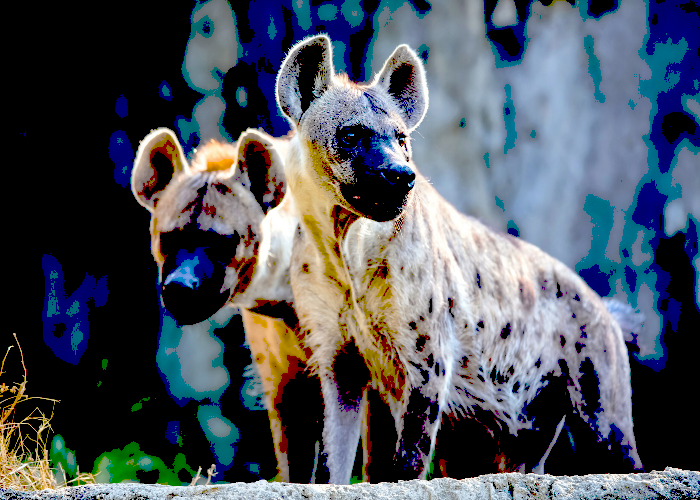

In [26]:
cv2_imshow(thresh)